___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-32-9294-9_28/MediaObjects/483279_1_En_28_Fig1_HTML.png" width="350px" height="180px" />

```Cristopher Corona Velasco```

```743940```

# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2025
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-32-9294-9_28/MediaObjects/483279_1_En_28_Fig1_HTML.png</p>

### <font color= #2E9AFE> Tema: Regresión Logística</font>

La regresión logística es un algoritmo de machine learning para clasificación que es usado para predecir la probabilidad de variables dependientes categóricas. 

**Cuándo usar la regresión logística**

- Clasificación Binaria: Cuando la variable dependiente tiene dos categorías. Ejemplo: predecir si un correo electrónico es "spam" o "no spam".
- Estimación de probabilidad: cuando necesita estimar la probabilidad de que ocurra un evento.
- Interpretabilidad: cuando se pretende comprender el impacto de las variables independientes en la probabilidad de un resultado particular.

**Supuestos de regresión logística**

- Requiere que las observaciones sean independientes entre sí
- El algoritmo de regresión logística requiere poca o ninguna multicolinealidad entre las variables independientes. Significa que las variables independientes no deben estar demasiado correlacionadas entre sí.
- El modelo de regresión logística supone linealidad de variables independientes y probabilidades logarítmicas.
- El éxito del modelo de regresión logística depende del tamaño de la muestra. Normalmente, se requiere un tamaño de muestra grande para lograr una alta precisión.

**¿Puede ser utilizada en problemas multiclase?**

Sí... utiliza el método de One vs Rest (One vs all)
Donde hace problemas binarios para cada combinación de clases y predice la clase con la probabilidad más alta. 


### En otro tema... lidiar con clases imbalanceadas en el target

**¿Cómo saber cuándo hay que balancear las clases?**

1. Imbalanceo severo. Cuando una clase es significativamente más frecuente (Ej. 90% vs 10% o peor). 
2. Importancia del problema a resolver. Si la clase minoritaria representa un resultado crítico (ej. detectar fraudes, diagnósticos médicos, fallas, etc.), balancear clases se vuelve necesario para evitar fallar en predicciones importantes. 

**¿Cuándo evitar el balanceo de clases?**
1. Balanceo no tan severo. Si el imbalanceo es menor (ej. 60% vs 40%), balancear puede que no sea tan necesario y hasta puede ser perjudicial ya que puede llevar al overfitting. 



**Ejercicio**

Se tienen datos de campañas de marketing (llamadas telefónicas) de un banco portugués. Se tiene la necesidad de predecir si un cliente va a suscribirse a un depósito a término (variable a predecir). 

Un depósito a término es un depósito que un banco ofrece con una tasa fija en la cual el dinero se regresará en cierto tiempo de madurez. 


### Los datos

Los datos se obtuvieron del repositorio de UCI Machine learning https://archive.ics.uci.edu/ml/datasets/bank+marketing
Consiste de 41188 datos. 


Variables de entrada:

- age (numerica)
- job : tipo de trabajo (categorica: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : estado marital (categorica: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorica: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- housing: tiene hipoteca? (categorica: 'no','yes','unknown')
- loan: tiene préstamos personales? (categorica: 'no','yes','unknown')
- contact: tipo de comunicación (categorical: 'cellular','telephone')
- month:último mes de contacto del año (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: último día de contacto de la semana (categorical: 'mon','tue','wed','thu','fri')
- duration: duración en segundos de la llamada. 
- campaign: número de llamadas realizadas durante esta campaña y para este cliente (numeric, includes last contact)
- pdays: número de días que pasaron después de que el cliente fue contactado de la campaña anterior (numeric; 999 means client was not previously contacted)
- previous: número de contactos realizados antes de esta campaña y para este cliente (numeric)
- poutcome: resultado de la campaña de marketing anterior (categorical: 'failure','nonexistent','success')
- emp.var.rate: tasa de variación del empleo - indicador trimestral (numeric)
- cons.price.idx: índice de precios al consumidor - indicador mensual  (numeric)
- cons.conf.idx: índice de confianza del consumidor - indicador mensual (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)


Variable de salida:
- y - se suscribió el cliente a un depósito a término? (binario: 'yes','no')

In [43]:
#Importar librerías
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [44]:
#importar datos
data = pd.read_csv('bank_full.csv')
#Quitar valores nulos
data = data.dropna()
print(data.shape)

(41188, 21)


In [45]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

### Exploración de datos

In [47]:
#cómo se ve la distribución de nuestra variable de salida


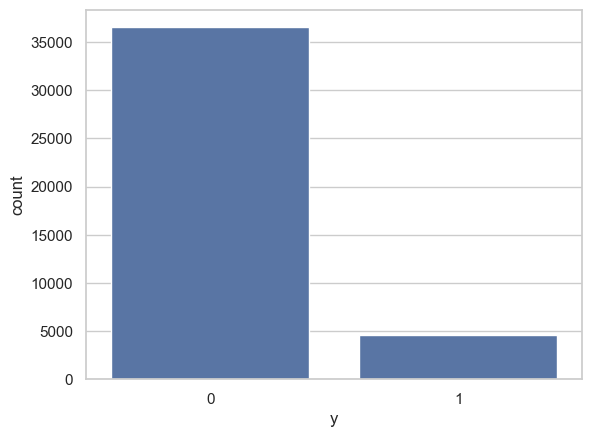

In [48]:
#graficando la distribucion de la variable a predecir
sns.countplot(x='y', data=data)
plt.show()


Los datos de salida están imbalanceados

Vamos a ver la distribución de las variables contra la variable de salida "Y" para empezar a ver qué variables podemos quitar o dejar

Text(0, 0.5, 'Proporcion de clientes')

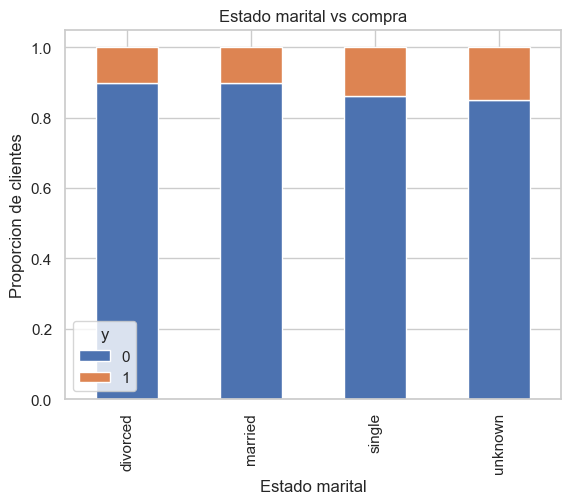

In [49]:
#Analizar variable Y vs estatus marital
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Estado marital vs compra')
plt.xlabel('Estado marital')
plt.ylabel('Proporcion de clientes')

El estado marital no parece ser un predictor bueno para predecir la compra

Text(0, 0.5, 'Proporcion de clientes')

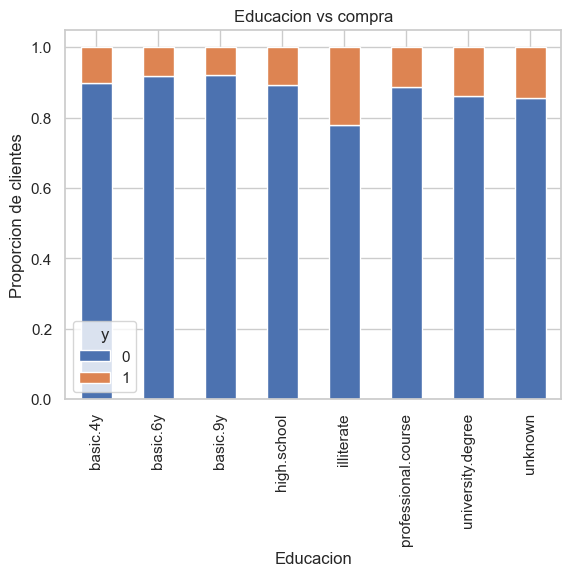

In [50]:
#Analizar variable Y vs educación
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Educacion vs compra')
plt.xlabel('Educacion')
plt.ylabel('Proporcion de clientes')

La educación parece ser un buen predictor para la variable a predecir

Text(0, 0.5, 'Proporcion de clientes')

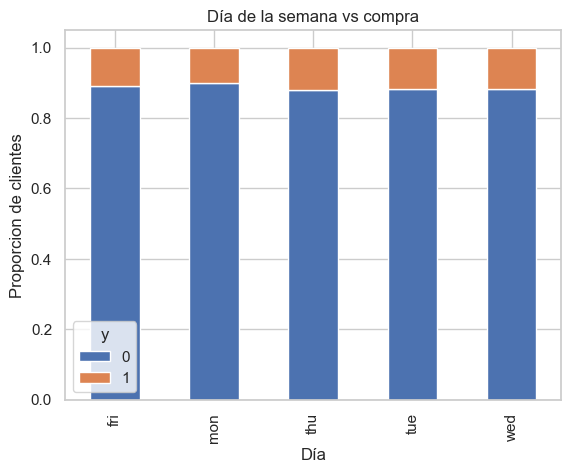

In [51]:
#Analizar variable Y vs día de la semana
table=pd.crosstab(data.day_of_week,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Día de la semana vs compra')
plt.xlabel('Día')
plt.ylabel('Proporcion de clientes')

El día de la semana puede no ser muy buen predictor

Text(0, 0.5, 'Proporcion de clientes')

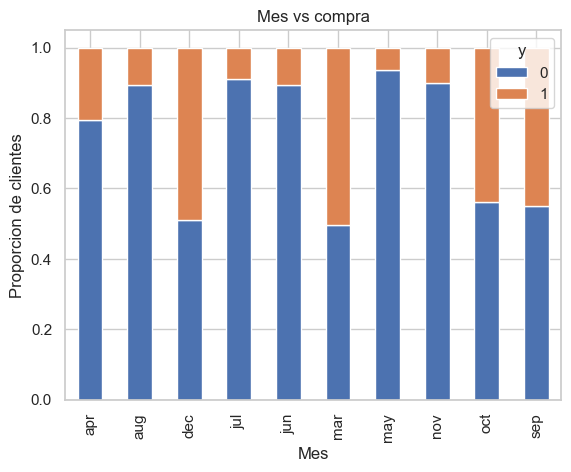

In [52]:
#Analizar variable Y vs mes
table=pd.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Mes vs compra')
plt.xlabel('Mes')
plt.ylabel('Proporcion de clientes')

El mes puede ser un buen predictor

In [53]:
#Dividir X de Y
X = data.loc[:,data.columns!='y']
y = data.loc[:,data.columns=='y']

In [54]:
#Dividir en test y train --> recordamos usar el stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
columns = X_train.columns

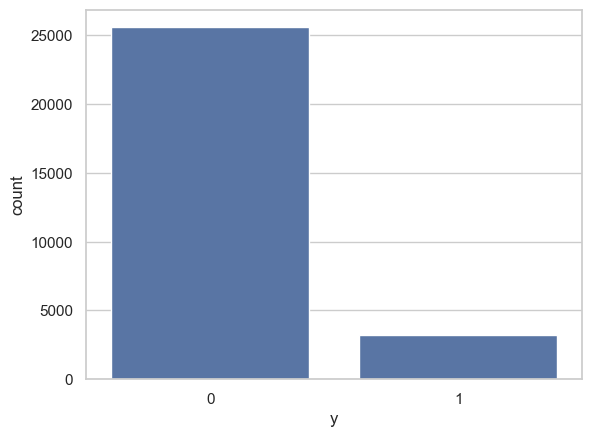

In [55]:
sns.countplot(x='y', data=y_train)
plt.show()

### Limpieza de datos


**Limpiar variables categóricas**

Vamos a usar one-hot encoding para convertir variables categóricas a numéricas

In [56]:
#Separamos las variables numericas de las categoricas
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.values
numeric_features = numeric_features[numeric_features != 'y']

category_features = X_train.select_dtypes(include=['object', 'bool']).columns.values

print("Variables numericas:", numeric_features)
print("Variables categoricas:",category_features)

Variables numericas: ['age' 'duration' 'campaign' 'pdays' 'previous' 'emp_var_rate'
 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed']
Variables categoricas: ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


In [57]:
#Se crean dos pipelines: uno para transformar las variables numéricas y otro para las categóricas.

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Se combina ambos transformadores (numérico y categórico) en un solo preprocesador que puede aplicarse a los datos para procesar todas las variables en conjunto.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, category_features)])

ohe = preprocessor.fit(X_train)

X_train_t = ohe.transform(X_train)
X_test_t = ohe.transform(X_test)

In [58]:

#Aunque OneHotEncoder ya realiza la codificación de variables categóricas, la función dummify tiene dos propósitos:
#1. Obtener los Nombres de las Columnas Generadas
# 2. Convertir el Array Transformado en un DataFrame

def dummify(ohe, x, columns):
    transformed_array = ohe.transform(x)

    enc = ohe.named_transformers_['cat'].named_steps['onehot']
    feature_lst = enc.get_feature_names_out(category_features.tolist())   
    
    cat_colnames = np.concatenate([feature_lst]).tolist()
    all_colnames = numeric_features.tolist() + cat_colnames 
    
    df = pd.DataFrame(transformed_array, index = x.index, columns = all_colnames)
    
    return transformed_array, df

In [59]:

X_train_t_array, X_train_t = dummify(ohe, X_train, category_features)
X_test_t_array, X_test_t = dummify(ohe, X_test, category_features)

X_train_t.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
27598,1.049956,-0.366548,0.154998,0.193254,-0.347043,0.836619,-0.228638,0.950784,0.774599,0.843340,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
31026,0.282667,-0.809931,-0.209678,0.193254,1.679201,-1.200838,-0.867478,-1.427098,-1.280646,-0.942835,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
24524,-0.868267,-0.603797,0.154998,0.193254,-0.347043,0.836619,1.538990,-0.281391,0.769408,0.843340,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3744,-0.676445,-0.479338,0.154998,0.193254,-0.347043,0.645608,0.723561,0.885932,0.710571,0.329642,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
21460,-1.443734,-0.926611,9.636559,0.193254,-0.347043,0.836619,0.591985,-0.475945,0.774599,0.843340,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Balanceo de clases (SMOTE)

Recordar que el balanceo de clases es después de dividir los datos en train/test

In [61]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)  # sin n_jobs

os_data_X, os_data_y = os.fit_resample(X_train_t, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=X_train_t.columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['y'])




Con esto ya los datos están balanceados. Si se fijan sólo hicimos el oversampling en los datos de entrenamiento, ninguna de la información de los datos de test fueron usados para crear muestras sintéticas, por lo tanto ninguna información del test se filtra al entrenamiento del modelo. 

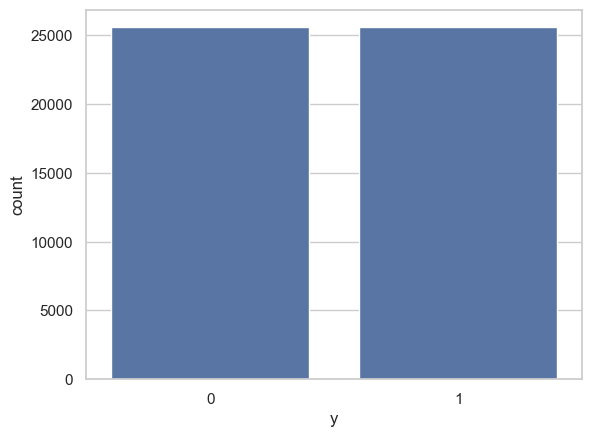

In [62]:

sns.countplot(x='y', data=os_data_y)
plt.show()

### Selección de variables

Usamos el algoritmo de Recursive Feature Elimination (RFE) para seleccionar variables considerando cada vez menos y menos conjuntos de variables. 

RFE es fácil de configurar y bastante eficaz a la hora de seleccionar funciones en un conjunto de datos de entrenamiento.

In [63]:
os_data_X.shape

(51166, 63)

In [64]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#crear modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=2000)

#crear el recursive feature elimination para la regresión logística
rfe = RFE(model, n_features_to_select=20, verbose=0)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print("Características seleccionadas: %s" % rfe.support_)
print("Rank de las características: %s" % rfe.ranking_)

Características seleccionadas: [False  True False False False  True  True False  True  True False False
 False False False  True False False False False False  True False False
 False  True False False False False  True False False False False  True
 False False False False False False False False  True False  True False
 False  True  True  True  True  True  True False False False False False
  True False  True]
Rank de las características: [36  1 19 31 40  1  1 26  1  1 39 17 11 37 20  1 12 18  8 38 33  1 23 22
 21  1  7  3  4  6  1 10 27  9 44  1 41 34  5 35 43 15 16 25  1 14  1 32
 13  1  1  1  1  1  1 28 30 24 29 42  1  2  1]


In [65]:
X_train_columns = X_train_t.columns
selected_columns = X_train_columns[rfe.support_]
print(selected_columns.tolist())

['duration', 'emp_var_rate', 'cons_price_idx', 'euribor3m', 'nr_employed', 'job_retired', 'job_unknown', 'marital_unknown', 'education_illiterate', 'default_unknown', 'contact_telephone', 'month_aug', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_success']


In [66]:
X_train_final = os_data_X[selected_columns.tolist()]
y_train_final = os_data_y['y']
X_test_final = X_test_t[selected_columns.tolist()]
y_test_final = y_test

X_test_final.head()

,duration,emp_var_rate,cons_price_idx,euribor3m,nr_employed,job_retired,job_unknown,marital_unknown,education_illiterate,default_unknown,contact_telephone,month_aug,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success
39935,-0.456002,-0.118439,-0.651069,0.260067,0.396104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30199,-0.798263,-0.118439,-0.651069,0.228341,0.396104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17755,-0.199307,0.836619,0.591985,0.768831,0.843340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768,-0.522121,-1.901215,-1.916629,-1.497534,-1.259916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21784,-0.615465,0.645608,0.723561,0.709418,0.329642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Seleccion de variables usando statsmodels

In [67]:
#pip install stastmodels

In [68]:
#Implementar modelo

# statsmodels es un paquete que proporciona funciones para la estimación de muchos modelos estadísticos,
#así como para realizar pruebas estadísticas y exploración de datos estadísticos.
import statsmodels.api as sm
logit_model=sm.Logit(y_train_final,X_train_final)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.323508
         Iterations 7
                           Results: Logit
Model:                Logit             Method:            MLE       
Dependent Variable:   y                 Pseudo R-squared:  0.533     
Date:                 2025-11-25 21:28  AIC:               33145.1747
No. Observations:     51166             BIC:               33322.0313
Df Model:             19                Log-Likelihood:    -16553.   
Df Residuals:         51146             LL-Null:           -35466.   
Converged:            1.0000            LLR p-value:       0.0000    
No. Iterations:       7.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
duration              1.8052   0.0185  97.7324 0.0000  1.7690  1.8414
emp_var_rate    

p value > 0.05, significa que podemos quitar la variable

Una vez que terminamos de seleccionar variables, creamos el modelo de regresión logística. 

Pero antes... ¿Cómo interpretar estos coeficientes?

- Para las variables numéricas que se les aplicó escalamiento: los coeficientes representan el efecto de un aumento de una desviación estándar en la variable sobre las probabilidades logarítmicas de la variable objetivo.
 
Ejemplo: Para la variable de "duration". Un coeficiente de 1.83 significa que si la duración de la llamada aumenta en una desviación estándar por encima del promedio, las probabilidades de que el cliente acepte la oferta aumentan por un factor de 6.23.

- Para las variables categóricas que se les aplicó el one-hot encoding: Los coeficientes de estas características binarias representan el cambio en las probabilidades logarítmicas de la variable objetivo al pasar de la categoría de referencia a la categoría representada por la característica.

Ejemplo: Para la variable categórica "month_nov". El coeficiente negativo (-1.4411) indica que estar en noviembre disminuye significativamente las probabilidades de que los clientes acepten la oferta.
Específicamente, estar en noviembre reduce las odds de aceptar la oferta a aproximadamente un 23.6%.

In [69]:
#Regresión logítica con sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Inicializar objeto
logreg = LogisticRegression()
#Ajustar modelo a datos de entrenamiento
logreg.fit(X_train_final, y_train_final)

LogisticRegression()

In [70]:
#Predecir con datos del test
y_pred = logreg.predict(X_test_final)


Para clasificación usamos otras métricas diferentes a las de regresión

In [71]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9387 1578]
 [ 171 1221]]


In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91     10965
           1       0.44      0.88      0.58      1392

    accuracy                           0.86     12357
   macro avg       0.71      0.87      0.75     12357
weighted avg       0.92      0.86      0.88     12357

